
   # <b><center><font size="15"><span style='font-family:"Times New Roman"'>Crime Data Analysis</span></font></center></b>

***
 

<u><font size="6"><span style='font-family:"Times New Roman"'>Problem Statement</span></font></u>

This exercise involves analyzing crime data from the city of Chicago which details actual historical reported crimes. The data contains the crime and categorization of the primary crime type, the location, and the date of the crime.



<u><font size="6"><span style='font-family:"Times New Roman"'>Model Objective</span></font></u>

Create an AI model which will predict future primary crime type for a given block or street location (not latitude and longitude)  

<u><font size="6"><span style='font-family:"Times New Roman"'>Detailed Steps Followed while building the model</span></font></u>

1. Loading the data set

2. Understading of the data(shape, info,descibre etc.)

3. Handle missing value data 

4. Perform EDA 

5. Preprocessing of data

6. Feature selection and reduction

7. Handle Class imbalance, Scaling etc

8. Build a model with hyper parameters

9. Evaluate the models using appropriate evaluation metrics. 

10. Get the inferences

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crimes/Crimes.xlsx


In [53]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Ignore warnings 
import warnings
warnings.filterwarnings('ignore')
# setting restriction on the number of rows and coulmns displayed in output
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
#importing all libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Importing the crime datasets
crime = pd.read_excel("../input/crimes/Crimes.xlsx",header=0)
# look at initial rows of the data
crime.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,11798117,JC397040,2019-08-17 23:59:00,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15
1,11798223,JC397365,2019-08-17 23:59:00,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44
2,11797883,JC396936,2019-08-17 23:57:00,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63
3,11797909,JC397003,2019-08-17 23:55:00,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46
4,11797926,JC396947,2019-08-17 23:45:00,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46
5,11797877,JC396925,2019-08-17 23:42:00,023XX N MILWAUKEE AVE,520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,True,False,1414,14,1.0,22
6,11797907,JC396922,2019-08-17 23:42:00,061XX S DR MARTIN LUTHER KING JR DR,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,313,3,20.0,42
7,11798114,JC396931,2019-08-17 23:40:00,011XX S CANAL ST,460,BATTERY,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,124,1,25.0,28
8,11797953,JC396974,2019-08-17 23:39:00,014XX N NORTH PARK AVE,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,SIDEWALK,True,False,1821,18,27.0,8
9,11797975,JC396957,2019-08-17 23:33:00,044XX W 26TH ST,313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,False,1013,10,22.0,30


In [4]:
#analyse the numerical columns
crime.describe()

,ID,Beat,District,Ward,Community Area
count,1.619420e+05,161942.000000,161942.000000,161935.000000,161942.000000
mean,1.165604e+07,1133.964555,11.111311,23.355000,36.554995
std,5.126516e+05,695.570169,6.946305,13.934785,21.365744
min,2.436800e+04,111.000000,1.000000,1.000000,0.000000
25%,1.161715e+07,611.000000,6.000000,10.000000,23.000000
50%,1.167888e+07,1024.000000,10.000000,24.000000,32.000000
75%,1.173948e+07,1713.000000,17.000000,34.000000,53.000000
max,1.180480e+07,2535.000000,25.000000,50.000000,77.000000


The above details show thatthere are no major outliers in data


In [5]:
#get the complete infomation of each column
crime.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161942 entries, 0 to 161941
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    161942 non-null  int64         
 1   Case Number           161942 non-null  object        
 2   Date                  161942 non-null  datetime64[ns]
 3   Block                 161942 non-null  object        
 4   IUCR                  161942 non-null  object        
 5   Primary Type          161942 non-null  object        
 6   Description           161942 non-null  object        
 7   Location Description  161373 non-null  object        
 8   Arrest                161942 non-null  bool          
 9   Domestic              161942 non-null  bool          
 10  Beat                  161942 non-null  int64         
 11  District              161942 non-null  int64         
 12  Ward                  161935 non-null  float64       
 13 

In [6]:
#Understanding the structure of Churn dataset
crime.shape

(161942, 14)

## Data Cleaning and Preparation

In [7]:
#Checking the number of missing values and its percentage
Total_missing = crime.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*crime.isnull().sum()/crime.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(30)

,Total_missing_values,Percent_missing_values
Location Description,569,0.351360
Ward,7,0.004323
Community Area,0,0.000000
District,0,0.000000
Beat,0,0.000000
Domestic,0,0.000000
Arrest,0,0.000000
Description,0,0.000000
Primary Type,0,0.000000
IUCR,0,0.000000


Only location description and ward column has missing values!!. And as the missing values of location is large can cant drop it. The ward column has less missing values for chose to drop it.

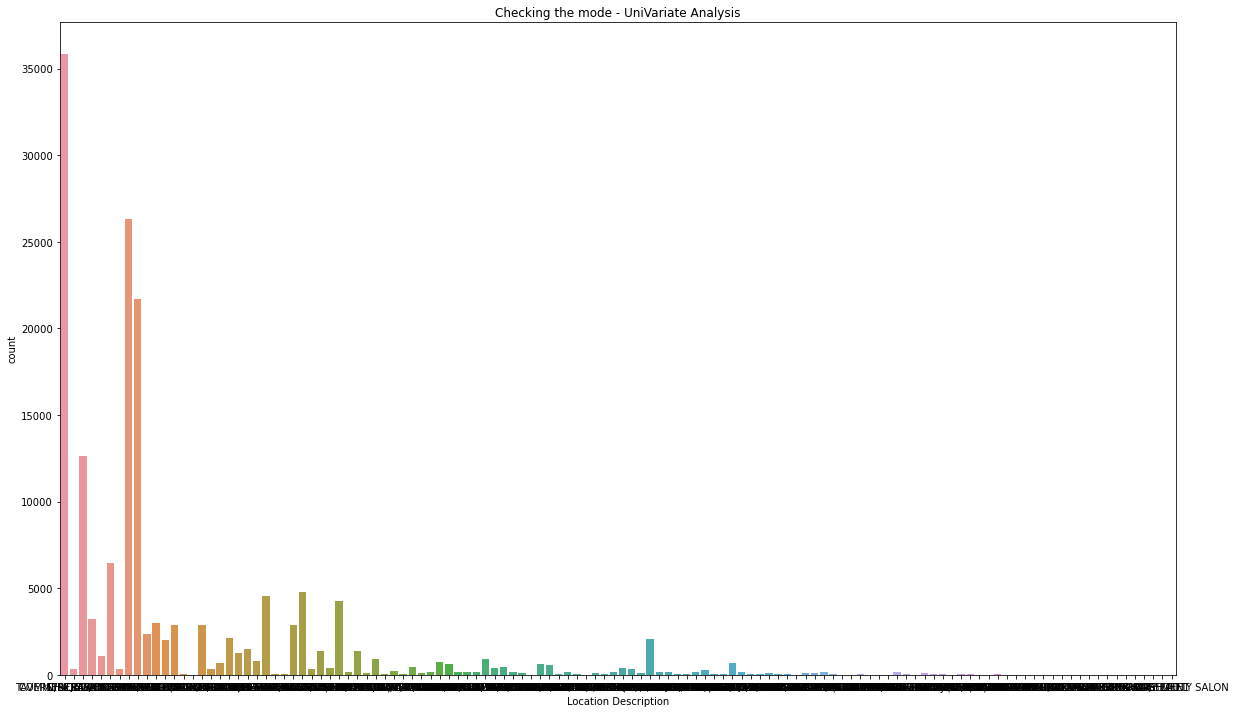

In [8]:
# let see how the location varible is distirbuted so that we can see how it can be imputed

plt.figure(figsize=(20,12))
sns.countplot(crime['Location Description'])
plt.title("Checking the mode - UniVariate Analysis")
plt.show()

In [9]:
crime['Location Description'].value_counts().iloc[:15]

STREET                            35876
RESIDENCE                         26329
APARTMENT                         21724
SIDEWALK                          12634
OTHER                              6451
PARKING LOT/GARAGE(NON.RESID.)     4800
RESTAURANT                         4529
SMALL RETAIL STORE                 4265
ALLEY                              3202
RESIDENTIAL YARD (FRONT/BACK)      2999
DEPARTMENT STORE                   2902
RESIDENCE PORCH/HALLWAY            2878
VEHICLE NON-COMMERCIAL             2876
GAS STATION                        2348
GROCERY FOOD STORE                 2140
Name: Location Description, dtype: int64

As it is a categorical value the simple method would be impute with mode is Street as the no of missing values are 569.
We can use advanted imputation techiniqu such as iterative imputer but it requires a lot of time and resources

In [10]:
crime['Location Description'] = crime['Location Description'].replace(np.nan,'STREET')

drop missing values in ward column as the count of missing values is very less

In [11]:
crime.dropna(inplace=True)

### Check to see if there are no missing values

In [12]:
#Checking the number of missing values and its percentage
Total_missing = crime.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*crime.isnull().sum()/crime.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(30)

,Total_missing_values,Percent_missing_values
Community Area,0,0.0
Ward,0,0.0
District,0,0.0
Beat,0,0.0
Domestic,0,0.0
Arrest,0,0.0
Location Description,0,0.0
Description,0,0.0
Primary Type,0,0.0
IUCR,0,0.0


## Separation of the block and address 

In [13]:
crime['Block'].value_counts().iloc[:50]

001XX N STATE ST                       658
0000X W TERMINAL ST                    288
008XX N MICHIGAN AVE                   273
0000X S STATE ST                       270
0000X N STATE ST                       233
011XX S CANAL ST                       185
100XX W OHARE ST                       185
064XX S DR MARTIN LUTHER KING JR DR    178
003XX E RANDOLPH ST                    177
0000X E RANDOLPH ST                    169
006XX N MICHIGAN AVE                   166
033XX N HALSTED ST                     166
005XX N STATE ST                       163
039XX W ROOSEVELT RD                   159
076XX S CICERO AVE                     154
039XX W MADISON ST                     141
040XX W WILCOX ST                      137
002XX W 87TH ST                        137
007XX N MICHIGAN AVE                   136
002XX E HURON ST                       134
0000X N DEARBORN ST                    133
083XX S STEWART AVE                    133
004XX W DIVISION ST                    130
008XX N STA

In [14]:
crime[['Block_Only','Address_Only']] = crime.Block.str.split(' ',1,expand=True) 

In [15]:
# view Block columns
crime['Block_Only']

0         058XX
1         007XX
2         022XX
3         086XX
4         079XX
          ...  
161937    027XX
161938    013XX
161939    045XX
161940    045XX
161941    092XX
Name: Block_Only, Length: 161935, dtype: object

In [16]:
#view Address columns
crime['Address_Only']

0                   W EDDY ST
1                   E 87TH ST
2                   W 50TH PL
3              S PHILLIPS AVE
4         S SOUTH CHICAGO AVE
                 ...         
161937            S TRIPP AVE
161938              W 72ND PL
161939            N BEACON ST
161940        N GREENVIEW AVE
161941           S NORMAL AVE
Name: Address_Only, Length: 161935, dtype: object

## Exploratory analysis and visualization

Our target columns is Crime Primary type so let's see the top 15 criminal activity.

In [17]:
crime['Primary Type'].value_counts().iloc[:15]

THEFT                               38202
BATTERY                             31727
CRIMINAL DAMAGE                     16806
ASSAULT                             13218
OTHER OFFENSE                       10761
DECEPTIVE PRACTICE                  10628
NARCOTICS                            8767
BURGLARY                             5824
MOTOR VEHICLE THEFT                  5712
ROBBERY                              4903
CRIMINAL TRESPASS                    4298
WEAPONS VIOLATION                    4062
OFFENSE INVOLVING CHILDREN           1478
INTERFERENCE WITH PUBLIC OFFICER     1016
PUBLIC PEACE VIOLATION               1003
Name: Primary Type, dtype: int64

theft is the most common crime activity followed by battery.
Lets visualise it

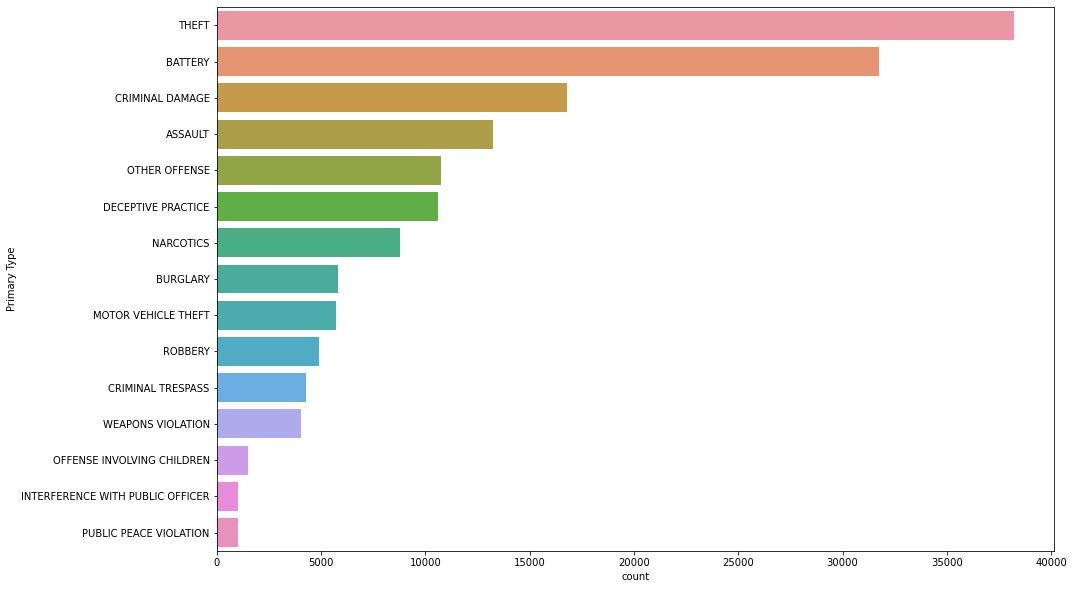

In [18]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = crime, order = crime['Primary Type'].value_counts().iloc[:15].index)

Text(0.5, 1.0, 'Top 5 address of crimes')

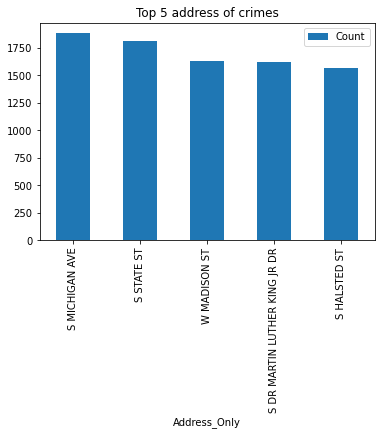

In [19]:
# Top 5 Address block of crime

crime_location = pd.DataFrame(crime.groupby('Address_Only').size().sort_values(ascending=False).rename('Count').reset_index())
crime_location.head()
crime_location[:5].plot(x='Address_Only',y='Count',kind='bar')
plt.title("Top 5 address of crimes")

In [20]:
crime_location.head()

,Address_Only,Count
0,S MICHIGAN AVE,1882
1,S STATE ST,1812
2,W MADISON ST,1631
3,S DR MARTIN LUTHER KING JR DR,1620
4,S HALSTED ST,1570


Top 5 Address location of crimes are "Michigan Ave","s state st","W Madison st" ," Martin Luther King jr dr" ,'"s halstedst"

Text(0.5, 1.0, 'Top 5 address of crimes')

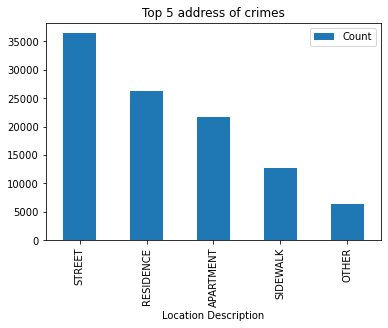

In [21]:
# Top 5 Location Description of crime

crime_location = pd.DataFrame(crime.groupby('Location Description').size().sort_values(ascending=False).rename('Count').reset_index())
crime_location.head()
crime_location[:5].plot(x='Location Description',y='Count',kind='bar')
plt.title("Top 5 address of crimes")

Top 5  location descriptions of crimes are "Street","Residence","apartment" ," sidewalk" ,'"Other"

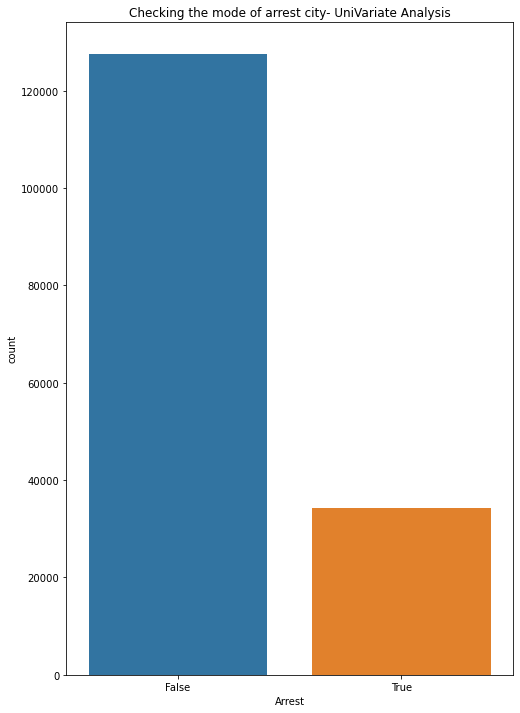

In [22]:
#Checking the comparision of arrest or not arrest
plt.figure(figsize=(8,12))
sns.countplot(crime.Arrest)
plt.title("Checking the mode of arrest city- UniVariate Analysis")
plt.show()

* We observe that the arrest rate is less

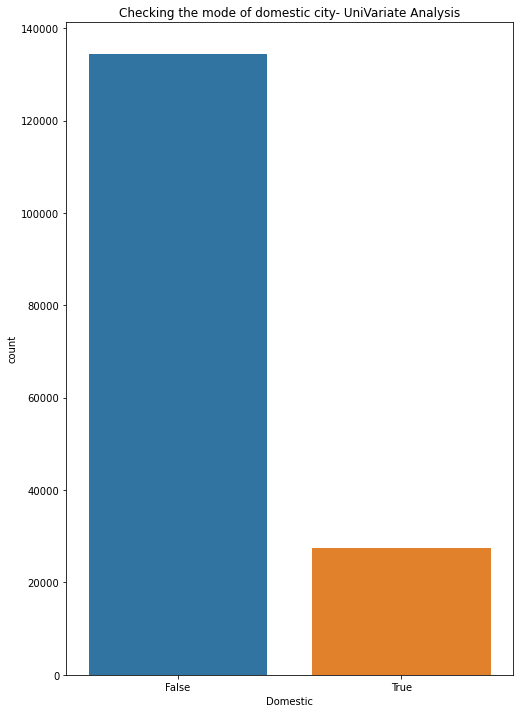

In [23]:
#Checking the comparision of domestic or not arrest
plt.figure(figsize=(8,12))
sns.countplot(crime.Domestic)
plt.title("Checking the mode of domestic city- UniVariate Analysis")
plt.show()

We observe that the domestic rate is less

### Bivariate anaysis with respect to target column "Primary type"

In [24]:
## Bivariate anaysis with respect to target column "Primary type"

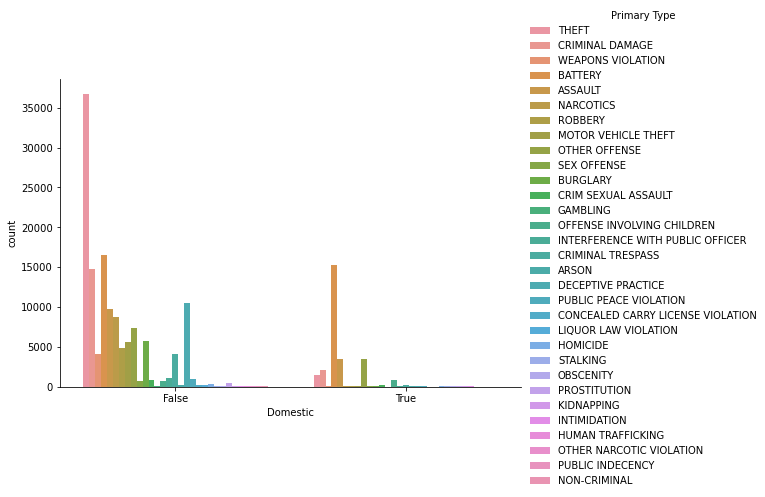

In [25]:
sns.catplot(x = "Domestic", hue = "Primary Type", data = crime, kind = "count", aspect =1.5)
plt.show()

Under False category of domestic Theft type count is more and among True categiry Assalut count is more

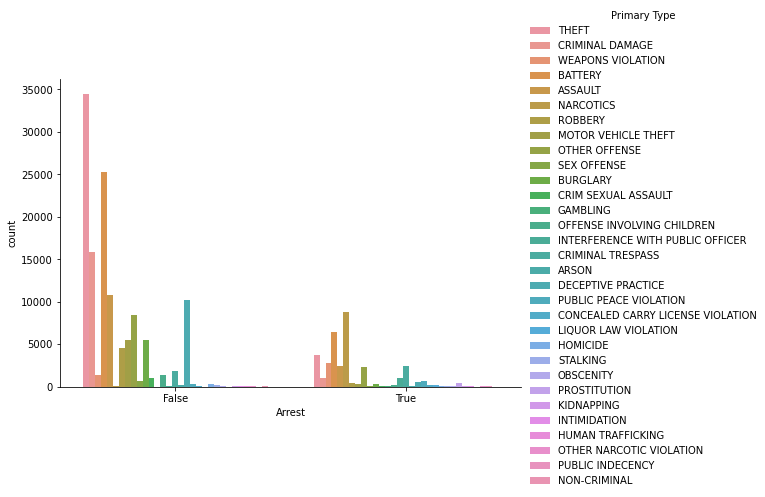

In [26]:
sns.catplot(x = "Arrest", hue = "Primary Type", data = crime, kind = "count", aspect =1.5)
plt.show()

Under False category of Arrest Theft type count is more and amond True categiry Assalut count is more

how a visualization (Primary Type) of crimes by block (Address) 

In [27]:
#number of unique values in Primary type
crime['Primary Type'].nunique()

31

In [28]:
crime['Primary Type'].value_counts()

THEFT                                38202
BATTERY                              31727
CRIMINAL DAMAGE                      16806
ASSAULT                              13218
OTHER OFFENSE                        10761
DECEPTIVE PRACTICE                   10628
NARCOTICS                             8767
BURGLARY                              5824
MOTOR VEHICLE THEFT                   5712
ROBBERY                               4903
CRIMINAL TRESPASS                     4298
WEAPONS VIOLATION                     4062
OFFENSE INVOLVING CHILDREN            1478
INTERFERENCE WITH PUBLIC OFFICER      1016
PUBLIC PEACE VIOLATION                1003
CRIM SEXUAL ASSAULT                    996
SEX OFFENSE                            771
PROSTITUTION                           455
HOMICIDE                               311
ARSON                                  222
LIQUOR LAW VIOLATION                   146
STALKING                               141
CONCEALED CARRY LICENSE VIOLATION      133
KIDNAPPING 

In [29]:
#number of unique values in Primary type
crime['Address_Only'].nunique()

2167

In [30]:
crime['Address_Only'].value_counts()

S MICHIGAN AVE                   1882
S STATE ST                       1812
W MADISON ST                     1631
S DR MARTIN LUTHER KING JR DR    1620
S HALSTED ST                     1570
                                 ... 
W Irving Park Rd                    1
N Ridgeway Ave                      1
N MOORMAN ST                        1
N LAKEFRONT DR                      1
N Cleaver St                        1
Name: Address_Only, Length: 2167, dtype: int64

In [31]:
#As Address has varied numer of values i am still generalising the address
crime[['Address_Block','Address_Street']] = crime.Address_Only.str.split(' ',1,expand=True) 

In [32]:
#number of unique values in Primary type
crime['Address_Street'].nunique()

1770

In [33]:
crime['Address_Street'].value_counts()

STATE ST          3255
MICHIGAN AVE      3089
HALSTED ST        2318
ASHLAND AVE       1933
CLARK ST          1787
                  ... 
VINE ST              1
PRINDIVILLE ST       1
MOSELLE AVE          1
36th St              1
Evergreen Ave        1
Name: Address_Street, Length: 1770, dtype: int64

In [34]:
# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = crime.groupby(['Primary Type'])['Address_Street'].size().reset_index()
all_classes['Amt'] = all_classes['Address_Street']
all_classes = all_classes.drop(['Address_Street'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
10,HOMICIDE,311
0,ARSON,222
15,LIQUOR LAW VIOLATION,146
28,STALKING,141
4,CONCEALED CARRY LICENSE VIOLATION,133
14,KIDNAPPING,112
13,INTIMIDATION,103
9,GAMBLING,92
19,OBSCENITY,31
11,HUMAN TRAFFICKING,8


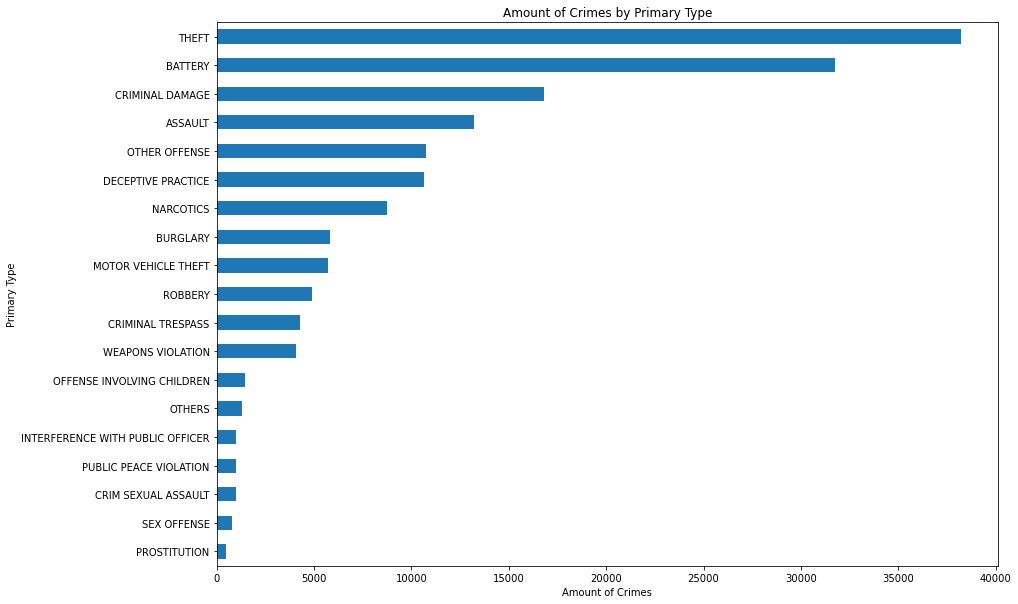

In [35]:
# After that, we replaced it with label 'OTHERS'
crime.loc[crime['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

crime.groupby([crime['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [36]:
Classes = crime['Primary Type'].unique()
Classes

array(['THEFT', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BATTERY',
       'ASSAULT', 'NARCOTICS', 'ROBBERY', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'SEX OFFENSE', 'BURGLARY', 'CRIM SEXUAL ASSAULT',
       'OTHERS', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION', 'PROSTITUTION'],
      dtype=object)

### EDA for top 5 locations with respect to Primary type of crime

In [37]:
eda_1_Add_1=crime.loc[crime['Address_Only'] == 'S MICHIGAN AVE']

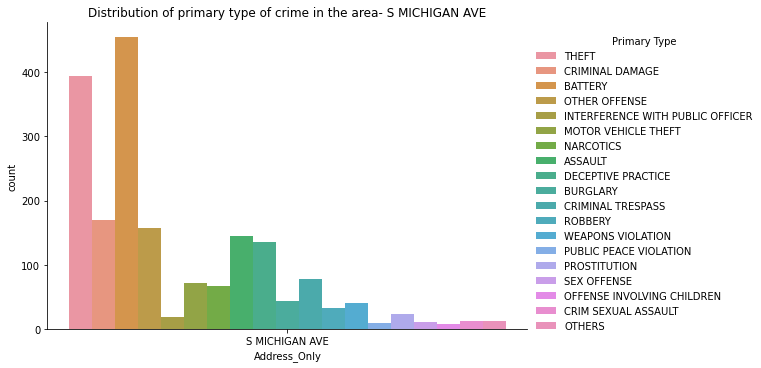

In [38]:
sns.catplot(x = "Address_Only", hue = "Primary Type", data = eda_1_Add_1, kind = "count", aspect =1.5)
plt.title("Distribution of primary type of crime in the area- S MICHIGAN AVE")
plt.show()

Battery primary type of crime rate is the highest followed by Theft

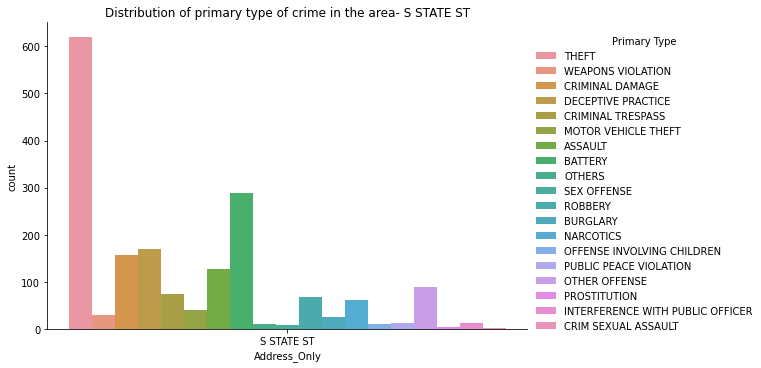

In [39]:
eda_1_Add_2=crime.loc[crime['Address_Only'] == 'S STATE ST']
sns.catplot(x = "Address_Only", hue = "Primary Type", data = eda_1_Add_2, kind = "count", aspect =1.5)
plt.title("Distribution of primary type of crime in the area- S STATE ST")
plt.show()
plt.show()

Theft is the highest followed by battery. We even Observe Criminal Damage and Deceptive practices rate is higher in this state

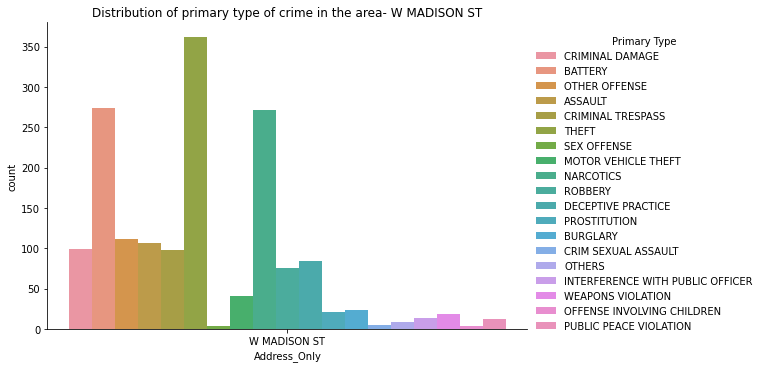

In [40]:
eda_1_Add_3=crime.loc[crime['Address_Only'] == 'W MADISON ST']
sns.catplot(x = "Address_Only", hue = "Primary Type", data = eda_1_Add_3, kind = "count", aspect =1.5)
plt.title("Distribution of primary type of crime in the area- W MADISON ST")
plt.show()

Theft is highest in this state followed by Battery and Motor Vehicle Theft

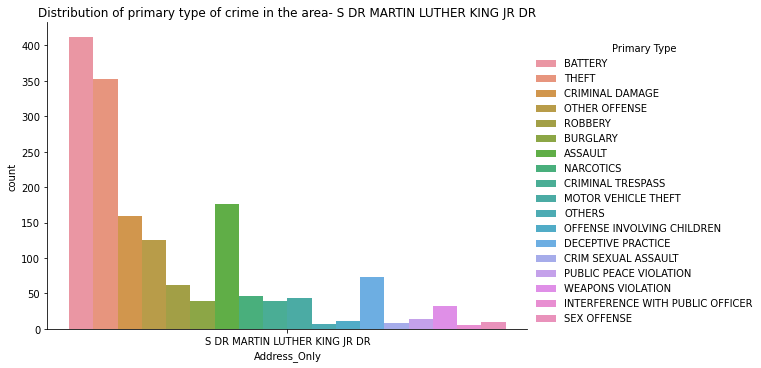

In [41]:
eda_1_Add_4=crime.loc[crime['Address_Only'] == 'S DR MARTIN LUTHER KING JR DR']
sns.catplot(x = "Address_Only", hue = "Primary Type", data = eda_1_Add_4, kind = "count", aspect =1.5)
plt.title("Distribution of primary type of crime in the area- S DR MARTIN LUTHER KING JR DR")
plt.show()

Battery and Theft is almost on the same range(battery is slightly higher)

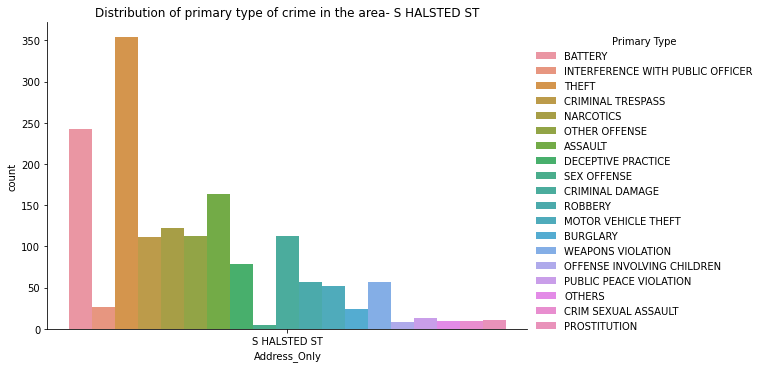

In [42]:
eda_1_Add_5=crime.loc[crime['Address_Only'] == 'S HALSTED ST']
sns.catplot(x = "Address_Only", hue = "Primary Type", data = eda_1_Add_5, kind = "count", aspect =1.5)
plt.title("Distribution of primary type of crime in the area- S HALSTED ST")
plt.show()

Theft is highest in this state followed by Battery

Inferences from above 5 graphs:
1. The area "S MICHIGAN AVE" - Battery primary type of crime rate is the highest followed by Theft.
2. The area "S STATE ST" - Theft is the highest followed by battery. We even Observe Criminal Damage and Deceptive practices rate is higher in this state
3. The area "W MADISON ST" - Theft is highest in this state followed by Battery and Motor Vehicle Theft
4. The area" S DR MARTIN LUTHER KING JR DR" - Battery and Theft is almost on the same range(battery is slightly higher)
5. The area "S HALSTED ST" - Theft is highest in this state followed by Battery

#### target columns convertion to numeric

In [43]:
crime['Primary Type'] = pd.factorize(crime["Primary Type"])[0] 
crime['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [44]:
# Convert Categorical Attributes to Numerical
crime['Block_Only'] = pd.factorize(crime["Block_Only"])[0]
crime['Address_Only'] = pd.factorize(crime["Address_Only"])[0]
crime['Address_Block'] = pd.factorize(crime["Address_Block"])[0]
crime['Address_Street'] = pd.factorize(crime["Address_Street"])[0]

crime['IUCR'] = pd.factorize(crime["IUCR"])[0]
crime['Description'] = pd.factorize(crime["Description"])[0]

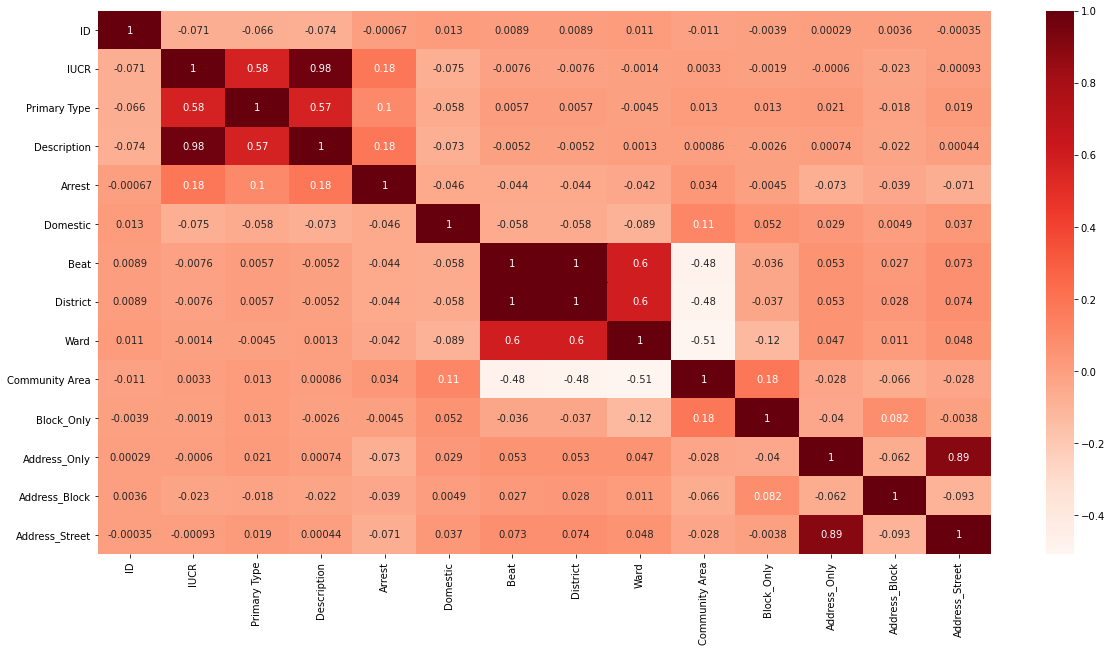

In [45]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = crime.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We see that few columns are highly correleated. Lets check the correctation with target variable

In [46]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.575838
Primary Type    1.000000
Description     0.571947
Name: Primary Type, dtype: float64

The correlation coefficient has values between -1 to 1

A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

A value closer to 1 implies stronger positive correlation

A value closer to -1 implies stronger negative correlation

## Note that the features related to address or Block are not highely correlated with the target variable ie Primary crime type So even if we build model using these variables we will get a less accuracy rate

## Feature selection and Feature engineering

In [47]:
# check all the features present in data
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'Block_Only', 'Address_Only',
       'Address_Block', 'Address_Street'],
      dtype='object')

Since the Problem Statement is to Predict the future primary crime type for a given block or street location so we can drop the other features which are not necessary

In [48]:
# We know that columns like id, case no, Date, Block ,'iucr','Location Descritiop', 'Arrest','Domestic'are not required to futher analsis.
#As we need to predict future primary crime type for a given block or street location
crime=crime.drop(['ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area',],axis=1)

In [49]:
# check all the features present in data
crime.columns

Index(['Primary Type', 'Block_Only', 'Address_Only', 'Address_Block',
       'Address_Street'],
      dtype='object')

### Finding correlation

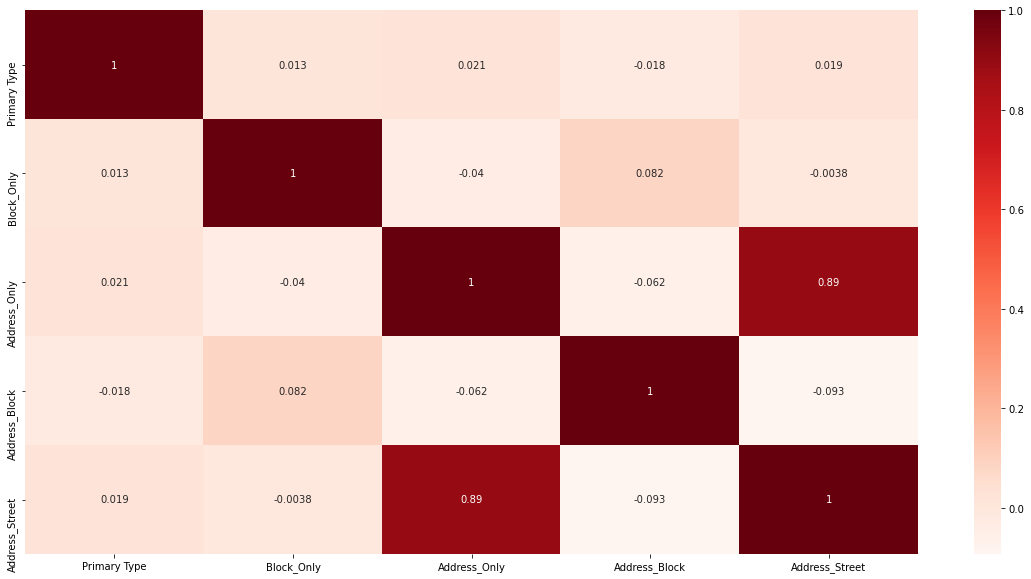

In [50]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = crime.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

As we see multi correlarity exists we can use PCA to handle this

Using PCA for feature reduction

In [51]:
df_PCA = crime.copy(deep=True)

In [54]:
#Test and train split
# divide data into train and test
X = df_PCA.drop("Primary Type", axis = 1)
y = df_PCA['Primary Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train)
X_test_scaled=scaler_lr.transform(X_test)

In [56]:
#Balancing dataset for classification
from imblearn.over_sampling import SMOTE

In [57]:
sm=SMOTE(random_state=100)
X_sm,y_sm=sm.fit_sample(X_train_scaled,y_train)
print(X_sm.shape)
print(y_sm.shape)

(544730, 4)
(544730,)


In [58]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [59]:
X_train_pca=pca.fit_transform(X_sm)
display(X_train_pca.shape)

X_test_pca = pca.transform(X_test_scaled)
display(X_test_pca.shape)

(544730, 4)

(40484, 4)

In [60]:
pca.components_

array([[-0.08751678,  0.69434322, -0.14533531,  0.6993611 ],
       [ 0.75033335,  0.11175256,  0.64110447,  0.11617353],
       [ 0.65457456, -0.06720967, -0.75296322, -0.00783473],
       [ 0.02954341,  0.70772998, -0.03015117, -0.7052208 ]])

In [61]:
pcadf=pd.DataFrame({'Feature':list(X.columns),'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2]})
pcadf.head()

,Feature,PC1,PC2,PC3
0,Block_Only,-0.087517,0.750333,0.654575
1,Address_Only,0.694343,0.111753,-0.067210
2,Address_Block,-0.145335,0.641104,-0.752963
3,Address_Street,0.699361,0.116174,-0.007835


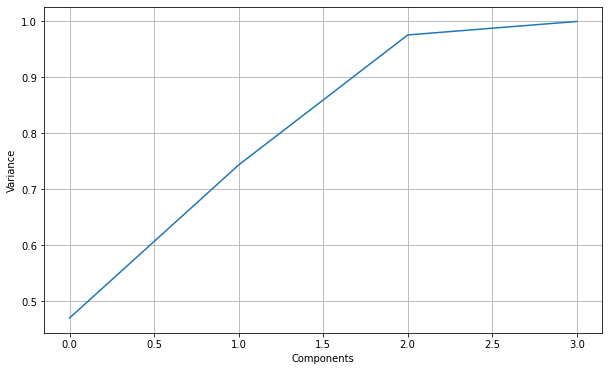

In [62]:

#Skree plot
f = plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [63]:

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([47.05, 74.37, 97.58, 99.99])

In [64]:
# We can use three components as it explans 97% varaince

In [65]:
pca_new = PCA(n_components=3)

In [66]:
X_train_pca_new = pca_new.fit_transform(X_sm)
X_test_pca_new = pca_new.transform(X_test_scaled)
print(X_train_pca_new.shape)
print(X_test_pca_new.shape)

(544730, 3)
(40484, 3)


## Building Random Forest with Default parameters first

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca_new,y_sm)

RandomForestClassifier()

In [68]:
y_pred_rf_pca = rf_pca.predict(X_test_pca_new)
print(classification_report(y_test,y_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.42      0.37      0.39      9532
           1       0.16      0.15      0.15      4119
           2       0.07      0.07      0.07      1044
           3       0.27      0.25      0.26      7981
           4       0.13      0.11      0.12      3336
           5       0.31      0.41      0.35      2209
           6       0.06      0.07      0.07      1196
           7       0.08      0.07      0.08      1401
           8       0.14      0.12      0.13      2713
           9       0.01      0.02      0.02       187
          10       0.10      0.10      0.10      1461
          11       0.04      0.07      0.05       239
          12       0.04      0.06      0.05       361
          13       0.04      0.05      0.05       370
          14       0.01      0.01      0.01       256
          15       0.11      0.20      0.14      1063
          16       0.17      0.19      0.18      2669
          17       0.03    

In [ ]:
# #Optimising with gridsearchcv
n_folds=5
params_grid={
    'max_depth': range(2,20,15),
     'min_samples_leaf': range(100, 400, 300),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200], 
     'max_features': [3]
 }

rf_grid_pca = RandomForestClassifier()
grid_rf_model_pca = GridSearchCV(rf_grid_pca,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
grid_rf_model_pca.fit(X_train_pca_new,y_sm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
grid_rf_model_pca.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, 
                                  min_samples_split = 100,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X_train,y_train)

# Prediction

rf1_y_pred = rf_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,rf1_y_pred))
print(confusion_matrix(y_test,rf1_y_pred))
print(classification_report(y_test,rf1_y_pred))

## Inference 

- Data understanding: Dataset: crime
                      shape:(161942, 14)
                      Target varaible: Primary type of Crime
- Two columns has missing values: location and ward
- Describe method shows that there are no major outliers in data
- EDA: 
    Univariate
       1. Theft is the most common crime activity followed by battery.
       2.Top 5 Address location of crimes are "Michigan Ave","s state st","W Madison st" ," Martin Luther King jr dr" ,'"s halstedst"
       3.Top 5  location descriptions of crimes are "Street","Residence","apartment" ," sidewalk" ,'"Other"
       4.We observe that the arrest rate is less on the whole of crime
       5. We observe that crime the domestic rate is less the whole
    BiVariate(wrt to Target)
        1.Under False category of domestic Theft type count is more and among True category Assalut count is more
        2. Under False category of Arrest Theft type count is more and amond True category Assalut count is more
- Show a visualization (Primary Type) of crimes by block (Address) 

        1. The area "S MICHIGAN AVE" - Battery primary type of crime rate is the highest followed by Theft.
        2. The area "S STATE ST" - Theft is the highest followed by battery. We even Observe Criminal Damage and Deceptive practices rate is higher in this state
        3. The area "W MADISON ST" - Theft is highest in this state followed by Battery and Motor Vehicle Theft
        4. The area" S DR MARTIN LUTHER KING JR DR" - Battery and Theft is almost on the same range(battery is slightly higher)
        5. The area "S HALSTED ST" - Theft is highest in this state followed by Battery        
- Columns with high Correlation with target variable 
        - IUCR            0.575838
        - Description     0.571947

- The problem statement was to predcit the type of crime using the address block and as those columns are not highly correlated with target variable we might get a model with less accuracy.
- PCA shows that 3 compoenents are enough to explain the 97% variance of the model
- Build randon forest with hyper parameter tunning andchose the best parameters and build the model.
 Model Accuracy with default parameters :22% 